## Consider a bar of length 2mm, height 1mm and thickness 1mm, made from steel (E = 210 GPa, $\nu=0.3$). The problem is modelled using a single Q8 element.
## A load of 100N is applied at the right edge, and rollers are constraining the left edge from moving in the x-direction. The midside node is also constrained from moving in the y-direction.
## The applied load is modelled using consistent nodal loads in the input file q8_element_pull.inp

# Question 1
## 1.1 Do you expect a plane stress analysis of the problem to do more or less work than a plane strain analysis? Motivate your anticipated result in one line.

-------

Answer here

-------

## 1.2 Compare the work done by the applied load for a plane stress and plane strain analysis of the prolbem using the q8_element_pull.inp file.

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0007 seconds.
Done assembling K and F    :   0.0054 seconds.
Done solving system        :   0.0771 seconds.
Done computing reactions   :   0.0003 seconds.
Done computing stresses    :   0.0024 seconds.
Done post-processing stress:   0.0035 seconds.
Done writing output        :   0.0013 seconds.


<IPython.core.display.Javascript object>


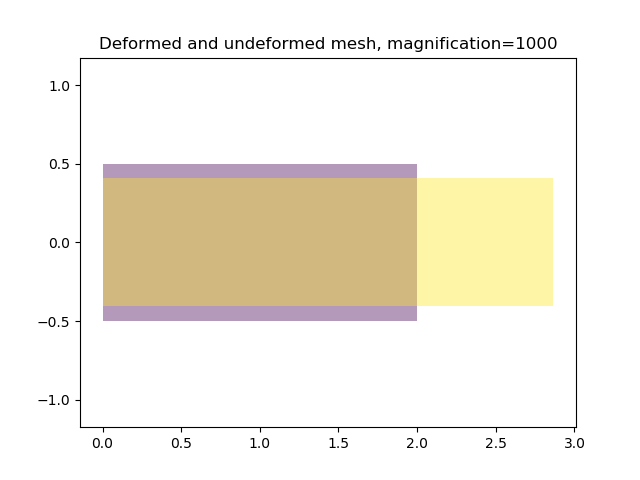

<IPython.core.display.Javascript object>


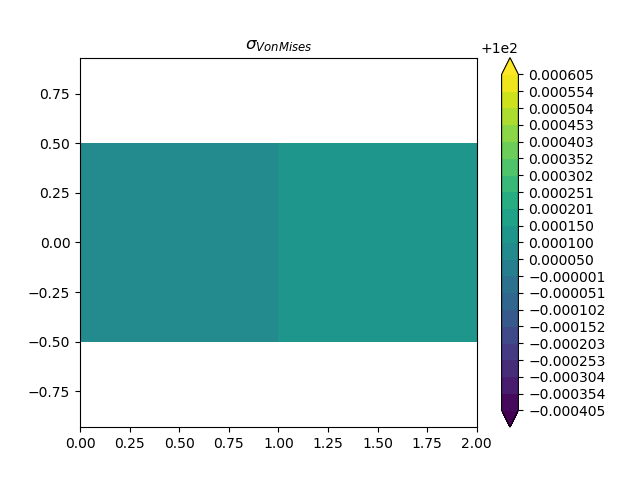

<IPython.core.display.Javascript object>


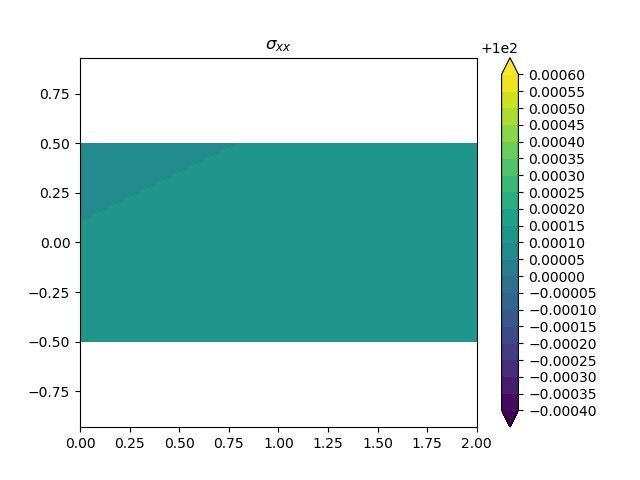

<IPython.core.display.Javascript object>


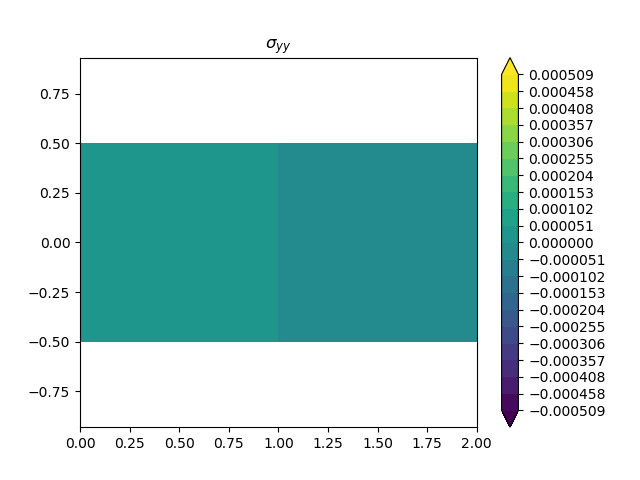

<IPython.core.display.Javascript object>


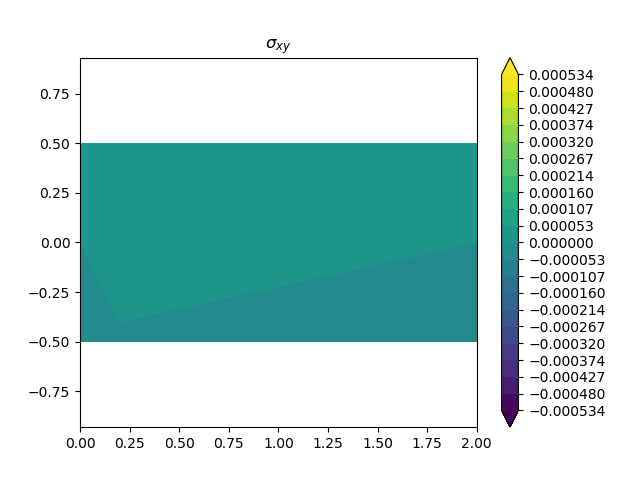

Work done: [[0.04333342]]


In [1]:
%matplotlib notebook
import numpy as np
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('q8_element_pull_planestrain',MagFac=1000)

F = np.zeros((16,1))
F[2*2-2] = 16.6667
F[3*2-2] = 16.6667
F[6*2-2] = 66.6667

print('Work done: {}'.format(0.5*np.dot(F.transpose(),U)))

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0005 seconds.
Done assembling K and F    :   0.0068 seconds.
Done solving system        :   0.1342 seconds.
Done computing reactions   :   0.0005 seconds.
Done computing stresses    :   0.0025 seconds.
Done post-processing stress:   0.0047 seconds.
Done writing output        :   0.0022 seconds.


<IPython.core.display.Javascript object>


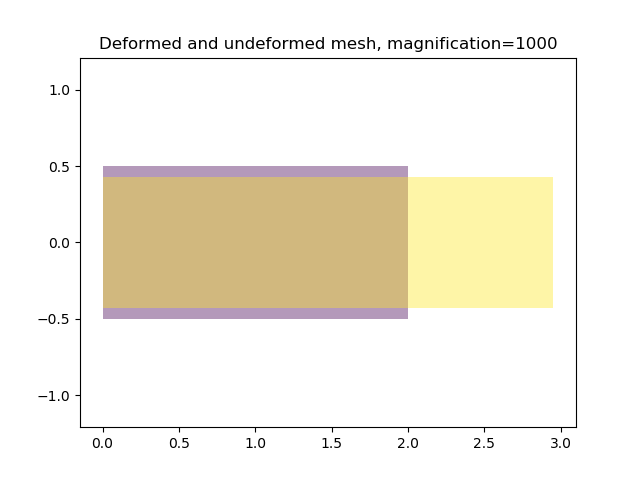

<IPython.core.display.Javascript object>


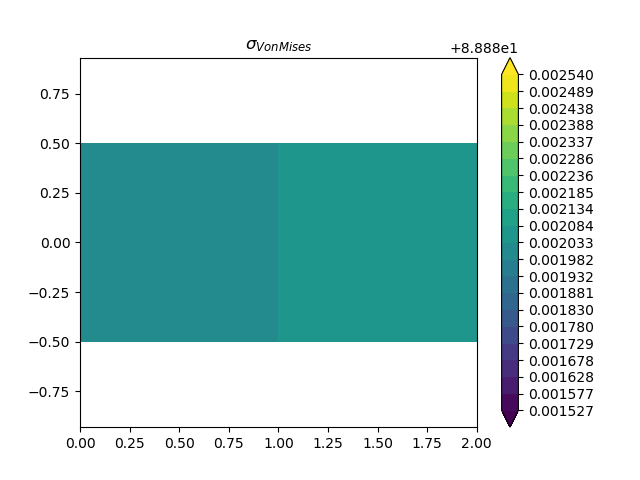

<IPython.core.display.Javascript object>


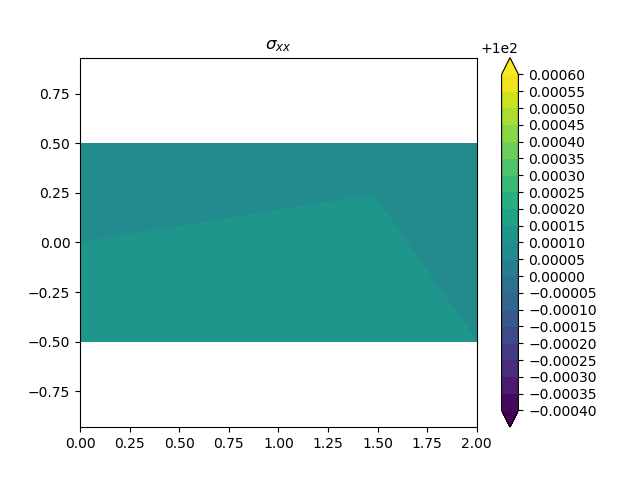

<IPython.core.display.Javascript object>


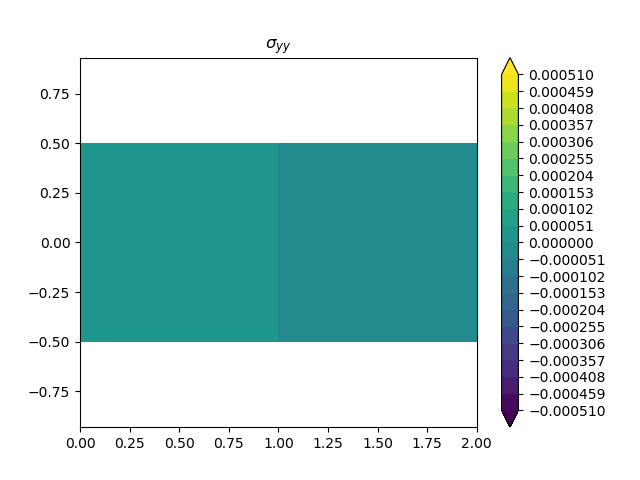

<IPython.core.display.Javascript object>


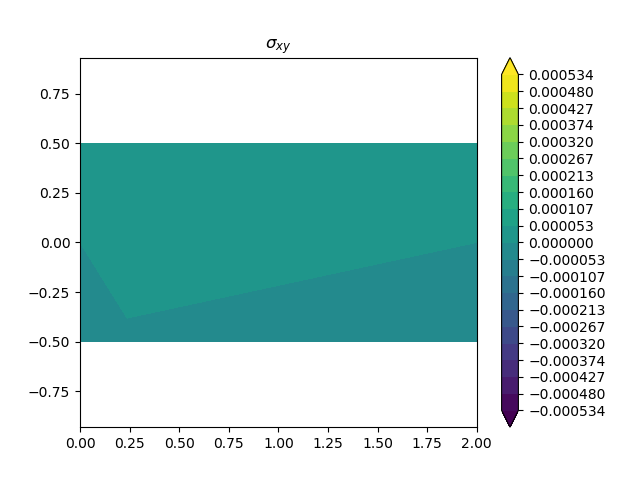

Add your calculation here


In [1]:
%matplotlib notebook
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('q8_element_pull_planestress',MagFac=1000)

print('Add your calculation here')

## 1.3 Compare the work done above against a hand calculation of the expected strain energy

--------

Add your calculation here

---------

## 1.4 If you were to model the applied load using a single force in the middle of the structure, do you expect the work done by the force to be more or less than the work done when consistent nodal loads are applied?
--------------

Answer here 

---------

## 1.5 Model applied load using a single force in the middle of the structure and compare the work done by the force to the work done when consistent nodal loads are applied. Modify the input file q8_element_pull.inp and call it q8_element_pull_planestress_pointload.inp


 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0011 seconds.
Done assembling K and F    :   0.0123 seconds.
Done solving system        :   0.0005 seconds.
Done computing reactions   :   0.0004 seconds.
Done computing stresses    :   0.0166 seconds.
Done post-processing stress:   0.0051 seconds.
Done writing output        :   0.0065 seconds.


<IPython.core.display.Javascript object>


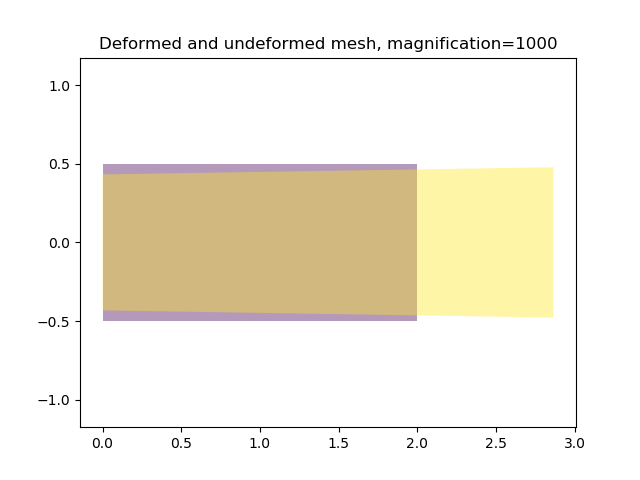

<IPython.core.display.Javascript object>


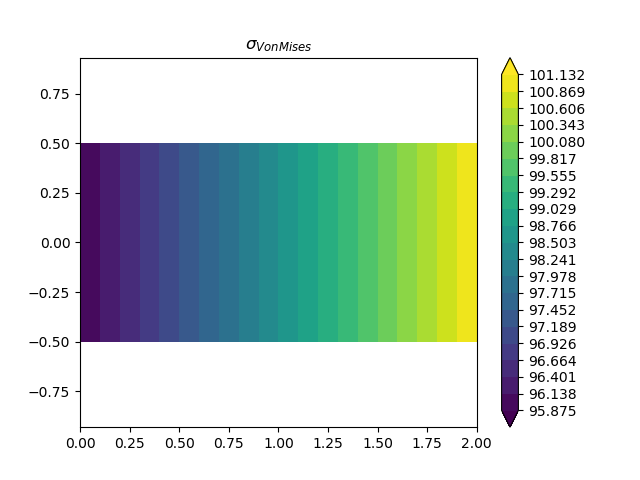

<IPython.core.display.Javascript object>


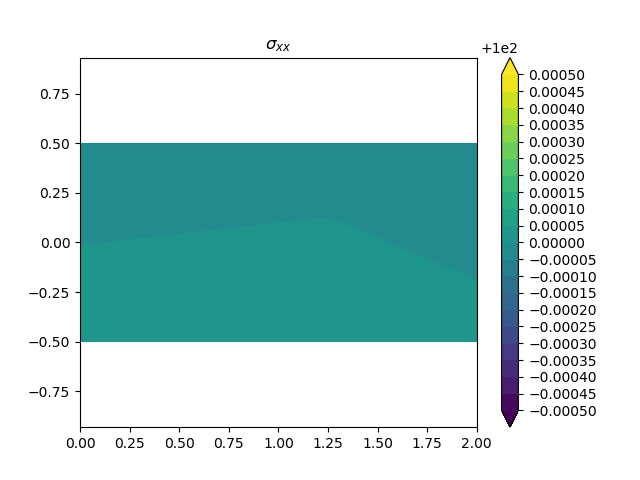

<IPython.core.display.Javascript object>


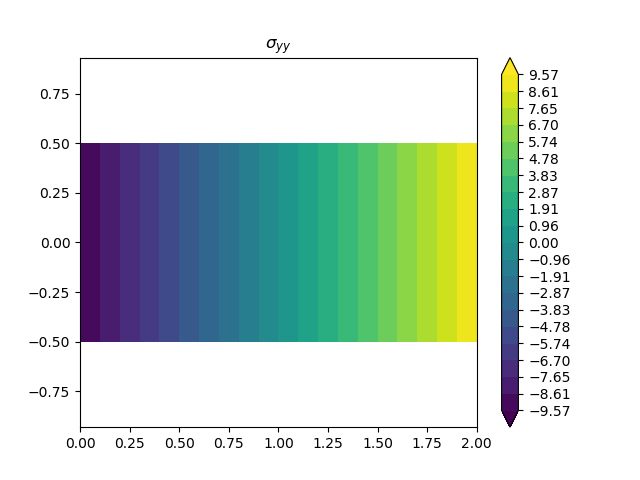

<IPython.core.display.Javascript object>


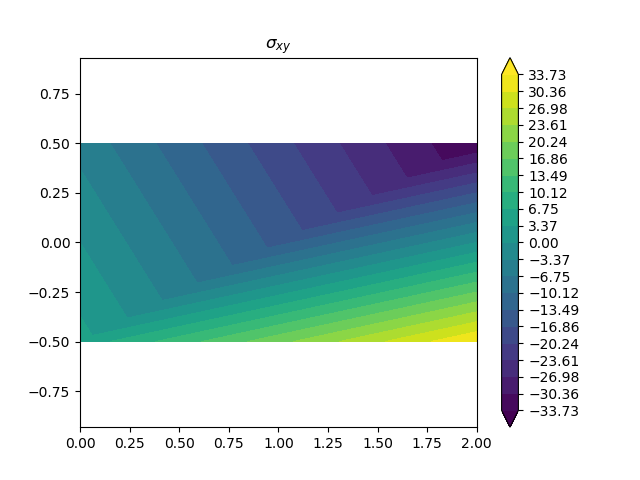

Do your calculation here


In [2]:
%matplotlib notebook
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('q8_element_pull_planestress_pointload',MagFac=1000)

print('Do your calculation here')

## 1.6 Compare the work done by the consistent nodal load and point load against a hand calculation of the expected strain energy. What do we learn from this comparison?


-------

Answer here!

-------

# Question 2
# In the remainder of the tutorial the structure modelled using a single four-noded (Q4) element, the nodal positions and material properties are given below.
## 2.1 Compare mode shapes and strain energy of an element of dimensions 2mm x 2mm x 1mm (thickness) modelled as plane stress versus plane strain. Identify the deformation modes that changed and those that did not change. For those that did change, identify whether the strain energy increased or decreased between plane stress and plane strain models.

-----------------------
Plane Stress: Eight Eigenvalues
 [ 3.00000000e+05  1.61538462e+05  1.61538462e+05  1.03846154e+05
  1.03846154e+05 -2.82071761e-11 -7.43349730e-12  2.32615489e-12]


<IPython.core.display.Javascript object>


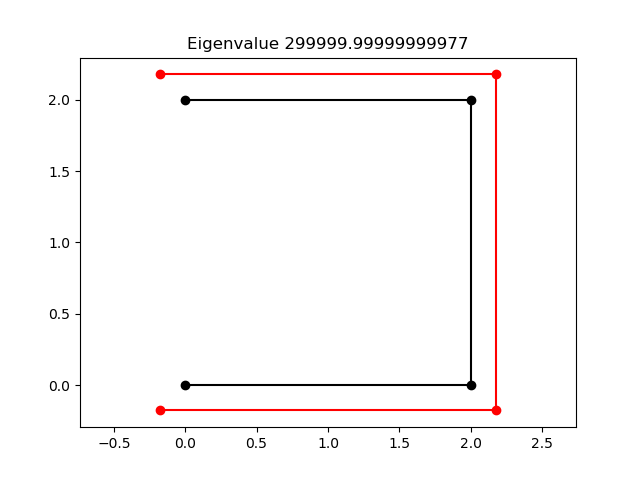

Plane Strain: Eight Eigenvalues
 [ 4.03846154e+05+0.00000000e+00j  1.76925141e-11+0.00000000e+00j
  1.61538462e+05+0.00000000e+00j  1.21153846e+05+0.00000000e+00j
  1.61538462e+05+0.00000000e+00j  1.21153846e+05+0.00000000e+00j
 -2.09963862e-12+9.53478212e-12j -2.09963862e-12-9.53478212e-12j]


<IPython.core.display.Javascript object>


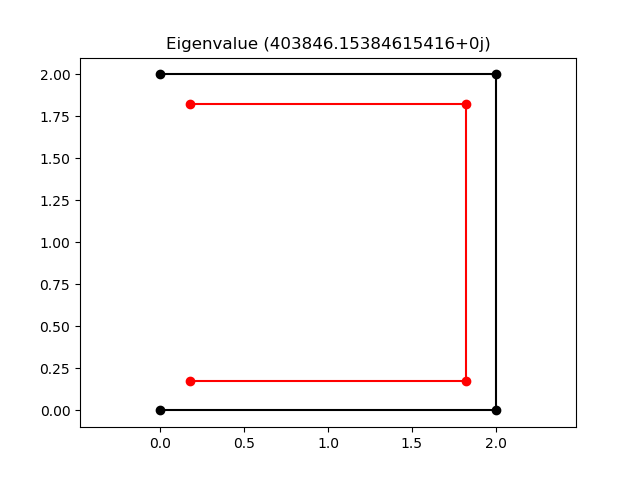

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [3]:
import numpy as np
from elements import Quad4_Stiffness

X = np.array([[0.0, 0],
              [2.0, 0],
              [2.0, 2],
              [0.0, 2]])

E = 2.1E5
v = 0.3
matDpstress = E/(1-v**2)*np.array([[1,v,0],[v,1,0,],[0,0,(1-v)/2]])
matDpstrain = E/((1+v)*(1-2*v))*np.array([[1-v,v,0],[v,1-v,0,],[0,0,(1-2*v)/2]])
print('-----------------------')

Kelem = Quad4_Stiffness(X,matDpstress,1.0)
Eigenvalue, Eigenvector = np.linalg.eig(Kelem)
print('Plane Stress: Eight Eigenvalues\n {}'.format(Eigenvalue))
Mode_Index = 0
Deformation = Eigenvector[:,Mode_Index]
import matplotlib.pyplot as plt
Factor = 0.5
NewX = (X[:,0] + Factor*np.take(Deformation,range(0,8,2))).transpose()
NewY = (X[:,1] + Factor*np.take(Deformation,range(1,8,2))).transpose()
plt.figure(100)
plt.plot(X[:,0],X[:,1],'k-o')
plt.plot(NewX, NewY,'r-o')
plt.title('Eigenvalue {}'.format(Eigenvalue[Mode_Index]))
plt.axis('equal')
plt.legend()
plt.show()


Kelem = Quad4_Stiffness(X,matDpstrain,1.0)
Eigenvalue, Eigenvector = np.linalg.eig(Kelem)
print('Plane Strain: Eight Eigenvalues\n {}'.format(Eigenvalue))
Mode_Index = 0
Deformation = Eigenvector[:,Mode_Index]
import matplotlib.pyplot as plt
Factor = 0.5
NewX = (X[:,0] + Factor*np.take(Deformation,range(0,8,2))).transpose()
NewY = (X[:,1] + Factor*np.take(Deformation,range(1,8,2))).transpose()
plt.figure(101)
plt.plot(X[:,0],X[:,1],'k-o')
plt.plot(NewX, NewY,'r-o')
plt.title('Eigenvalue {}'.format(Eigenvalue[Mode_Index]))
plt.axis('equal')
plt.legend()
plt.show()

Give your discussion here!

## 2.1 Compare the plane stress and plane strain deformation modes against each other for the material E = 210GPa and $\nu=0$.
## 2.2. Compare the mode shapes and strain energies between the two materials, one material with $\nu=0.3$ and the other material $\nu=0$. Identify the deformation modes that changed and those that did not change.

-----------------------
Plane Stress: Eight Eigenvalues
 [2.10000000e+05 1.05000000e+05 1.05000000e+05 7.26444898e-11
 2.10000000e+05 2.10000000e+05 1.01004603e-12 1.64228404e-11]


<IPython.core.display.Javascript object>


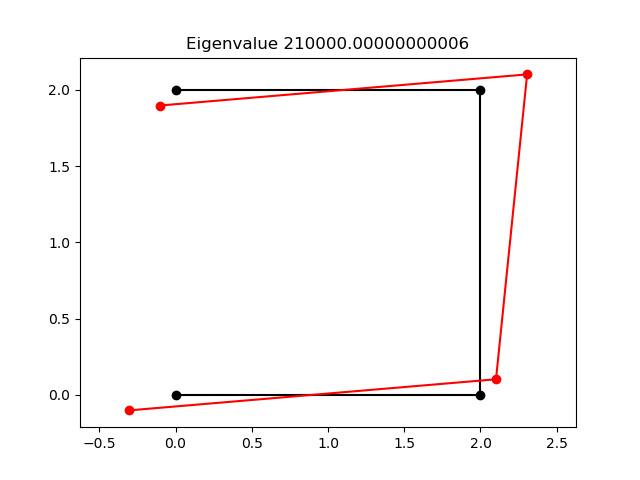

Plane Strain: Eight Eigenvalues
 [2.10000000e+05 1.05000000e+05 1.05000000e+05 7.26444898e-11
 2.10000000e+05 2.10000000e+05 1.01004603e-12 1.64228404e-11]


<IPython.core.display.Javascript object>


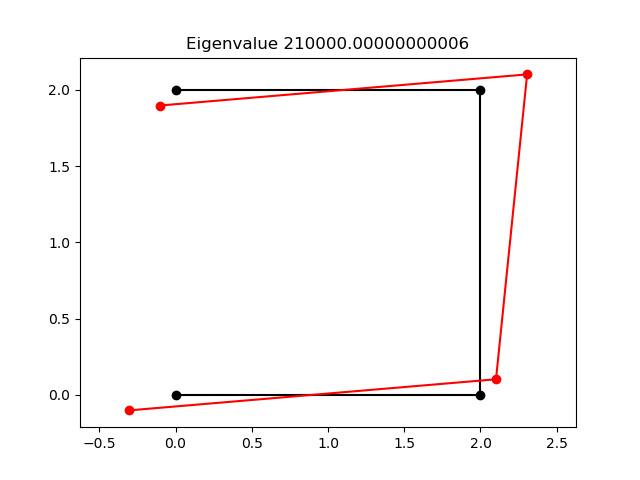

In [22]:
import numpy as np
from elements import Quad4_Stiffness

X = np.array([[0.0, 0],
              [2.0, 0],
              [2.0, 2],
              [0.0, 2]])

E = 2.1E5
v = 0.0
matDpstress = E/(1-v**2)*np.array([[1,v,0],[v,1,0,],[0,0,(1-v)/2]])
matDpstrain = E/((1+v)*(1-2*v))*np.array([[1-v,v,0],[v,1-v,0,],[0,0,(1-2*v)/2]])
print('-----------------------')

Kelem = Quad4_Stiffness(X,matDpstress,1.0)
Eigenvalue, Eigenvector = np.linalg.eig(Kelem)
print('Plane Stress: Eight Eigenvalues\n {}'.format(Eigenvalue))
Mode_Index = 0
Deformation = Eigenvector[:,Mode_Index]
import matplotlib.pyplot as plt
Factor = 0.5
NewX = (X[:,0] + Factor*np.take(Deformation,range(0,8,2))).transpose()
NewY = (X[:,1] + Factor*np.take(Deformation,range(1,8,2))).transpose()
plt.figure(200)
plt.plot(X[:,0],X[:,1],'k-o')
plt.plot(NewX, NewY,'r-o')
plt.title('Eigenvalue {}'.format(Eigenvalue[Mode_Index]))
plt.axis('equal')
plt.legend()
plt.show()


Kelem = Quad4_Stiffness(X,matDpstrain,1.0)
Eigenvalue, Eigenvector = np.linalg.eig(Kelem)
print('Plane Strain: Eight Eigenvalues\n {}'.format(Eigenvalue))
Mode_Index = 0
Deformation = Eigenvector[:,Mode_Index]
import matplotlib.pyplot as plt
Factor = 0.5
NewX = (X[:,0] + Factor*np.take(Deformation,range(0,8,2))).transpose()
NewY = (X[:,1] + Factor*np.take(Deformation,range(1,8,2))).transpose()
plt.figure(201)
plt.plot(X[:,0],X[:,1],'k-o')
plt.plot(NewX, NewY,'r-o')
plt.title('Eigenvalue {}'.format(Eigenvalue[Mode_Index]))
plt.axis('equal')
plt.legend()
plt.show()

Give your discussion here.

## 2.2 Compute the ratio of 
### 2.2.1. the uniform expansion strain energies of the two materials
### 2.2.2. the shear mode strain energies of the two materials
### 2.2.3. the ratio of the bulk modulus of the two materials
### 2.2.4. the ratio of the shear modulus of the two materials
### Identify any relationships that you were able to identify.


In [4]:
print('Do your calculations and your discussions here!')

Do your calculations and your discussions here!


# 3. Final study - compare the strain energies and mode shapes between a bar with lenght 2mm, height 2mm and thickness 1mm, modelled as plane stress against a bar of length 4mm, height 1mm and thickness 1mm.

-----------------------
2x2x1: Eight Eigenvalues
 [ 3.00000000e+05  1.61538462e+05  1.61538462e+05  1.03846154e+05
  1.03846154e+05 -2.82071761e-11 -7.43349730e-12  2.32615489e-12]


<IPython.core.display.Javascript object>


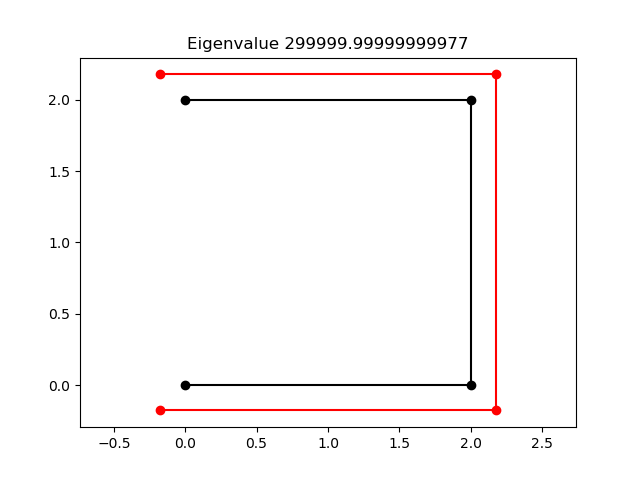

Update the nodal coordinates here to reflect 4 x 1 x 1 structure:
4x2x1: Eight Eigenvalues
 [ 3.00000000e+05  1.61538462e+05  1.61538462e+05  1.03846154e+05
  1.03846154e+05 -2.82071761e-11 -7.43349730e-12  2.32615489e-12]


<IPython.core.display.Javascript object>


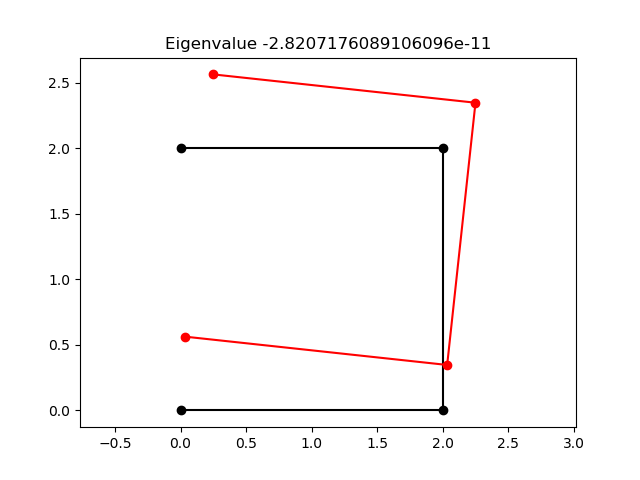

In [6]:
import numpy as np
from elements import Quad4_Stiffness

X = np.array([[0.0, 0],
              [2.0, 0],
              [2.0, 2],
              [0.0, 2]])

E = 2.1E5
v = 0.3
matDpstress = E/(1-v**2)*np.array([[1,v,0],[v,1,0,],[0,0,(1-v)/2]])
print('-----------------------')

Kelem = Quad4_Stiffness(X,matDpstress,1.0)
Eigenvalue, Eigenvector = np.linalg.eig(Kelem)
print('2x2x1: Eight Eigenvalues\n {}'.format(Eigenvalue))
Mode_Index = 0
Deformation = Eigenvector[:,Mode_Index]
import matplotlib.pyplot as plt
Factor = 0.5
NewX = (X[:,0] + Factor*np.take(Deformation,range(0,8,2))).transpose()
NewY = (X[:,1] + Factor*np.take(Deformation,range(1,8,2))).transpose()
plt.figure(300)
plt.plot(X[:,0],X[:,1],'k-o')
plt.plot(NewX, NewY,'r-o')
plt.title('Eigenvalue {}'.format(Eigenvalue[Mode_Index]))
plt.axis('equal')
plt.legend()
plt.show()

print('Update the nodal coordinates here to reflect 4 x 1 x 1 structure:')
X = np.array([[0.0, 0],
              [2.0, 0],
              [2.0, 2],
              [0.0, 2]])

Kelem = Quad4_Stiffness(X,matDpstress,1.0)
Eigenvalue, Eigenvector = np.linalg.eig(Kelem)
print('4x2x1: Eight Eigenvalues\n {}'.format(Eigenvalue))
Mode_Index = 5
Deformation = Eigenvector[:,Mode_Index]
import matplotlib.pyplot as plt
Factor = 1
NewX = (X[:,0] + Factor*np.take(Deformation,range(0,8,2))).transpose()
NewY = (X[:,1] + Factor*np.take(Deformation,range(1,8,2))).transpose()
plt.figure(301)
plt.plot(X[:,0],X[:,1],'k-o')
plt.plot(NewX, NewY,'r-o')
plt.title('Eigenvalue {}'.format(Eigenvalue[Mode_Index]))
plt.axis('equal')
plt.legend()
plt.show()

In [7]:
print('Give your discussion here!')

Give your discussion here!
